# Rejection Sampling


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Basic Rejection Sampling

The basic idea, come up with by von Neumann is:

If you have a function you are trying to sample from, whose functional form is well known, basically accept the sample by generating a uniform random number at any $x$ and accepting it if the value is below the value of the function at that $x$.

This is illustrated in the diagram below:

![](images/Rejection.png)


### The process

1. Draw $x$ uniformly from $[x_{min},\, x_{max}]$
2. Draw $y$ uniformly from [0,$y_{max}$]
3. if $y$ < f($x$), accept the sample
4. otherwise reject it
5. repeat

This works  as more samples will be accepted in the regions of $x$-space where the function $f$ is higher: indeed they will be accepted in the ratio of the height of the function at any given $x$ to $y_{max}$.

The reason this all works is the frequentist interpretation of probability in each $x$ sliver
As we have more samples the accept-to-total ratio reflects the probablity mass in that sliver better.

### Example

The following code produces samples that follow the distribution $P(x)=e^{-x}$ 
  for $x=[0,10]$ and generates a histogram of the sampled distribution. 

Count 100294 Accepted 10000


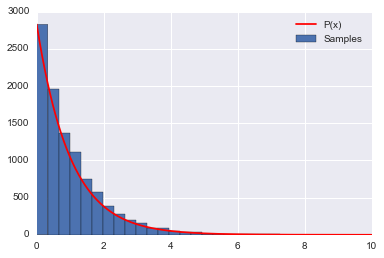

In [3]:

P = lambda x: np.exp(-x)

# domain limits
xmin = 0 # the lower limit of our domain
xmax = 10 # the upper limit of our domain

# range limit (supremum) for y
ymax = 1
#you might have to do an optimization to find this.

N = 10000 # the total of samples we wish to generate
accepted = 0 # the number of accepted samples
samples = np.zeros(N)
count = 0 # the total count of proposals

# generation loop
while (accepted < N):
    
    # pick a uniform number on [xmin, xmax) (e.g. 0...10)
    x = np.random.uniform(xmin, xmax)
    
    # pick a uniform number on [0, ymax)
    y = np.random.uniform(0,ymax)
    
    # Do the accept/reject comparison
    if y < P(x):
        samples[accepted] = x
        accepted += 1
    
    count +=1
    
print("Count",count, "Accepted", accepted)

# get the histogram info
hinfo = np.histogram(samples,30)

# plot the histogram
plt.hist(samples,bins=30, label=u'Samples');

# plot our (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(xvals, hinfo[0][0]*P(xvals), 'r', label=u'P(x)')

# turn on the legend
plt.legend()


Notice that $y_{max}$ was just assumed here. In general we might have to do a maximization. This has a cost. We want to keep this cost low, or we might be spending some time there. If the optimization is complex, it might be cheaper to  do something else...

## Rejection Sampling with Steroids

The simple rejection sampling method has fundamental problems.  

For our simple example, it's quite easy to determine the supremum.  In practice, while you may know how to quickly (i.e. constant time) evaluate your function everywhere on the domain of interest, finding a bound very close to the  supremum may not be a feasible calculation.  In addition, even if you find a tight bound for the supremum, basic rejection sampling will still be very inefficient as you will reject many samples (especially in low density regions). 

This is a hard problem to solve and we will need other techniques to address this problem of **low acceptance probability**.

However, it is possible to do a more efficient job while still taking advantage of the simplicity of rejection sampling.  Our modified technique will introduce a **proposal density** $g(x)$. This notion of a proposal density is one used in many sampling techniques, in different ways, but its importance will always lie in figuring ways to increase the acceptance rate.

The proposal density will have the following characteristics:

- $g(x)$ is easy to sample from and (calculate the pdf)
- Some $M$ exists so that $M \, g(x) > f(x)$ in your entire domain of interest
- ideally $g(x)$ will be somewhat close to $f$ so that you'll sample more in high density regions  and much less in low density regions

Its probably obvious that an optimal value for M is the supremum over your domain of interest of $f/g$.

Once you've picked a proposal distribution g, your modified rejection sampling technique is as follows:

1. Draw $x$ from your proposal distribution $g(x)$
2. Draw $y$ uniformly from [0,1]
3. if $y$ < f($x$)/$M g(x)$, accept the sample
4. otherwise reject it
5. repeat

The entire process is illustrated in the diagram below:

![](images/rejsteroid.png)

**Example**

The following code produces samples that follow the distribution $P(x)=e^{-x}$ 
  for $x=[0,10]$ and generates a histogram of the sampled distribution. 

Count 23809 Accepted 10000


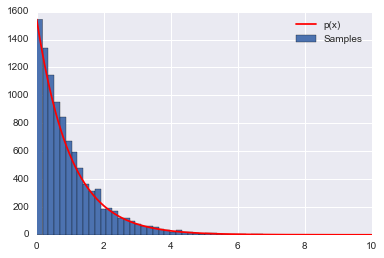

In [5]:

p = lambda x: np.exp(-x)  # our distribution
g = lambda x: 1/(x+1)  # our proposal pdf (we're thus choosing M to be 1)
invCDFg = lambda x: np.log(x +1) # generates our proposal using inverse sampling

# domain limits
xmin = 0 # the lower limit of our domain
xmax = 10 # the upper limit of our domain

# range limits for inverse sampling
umin = invCDFg(xmin)
umax = invCDFg(xmax)

N = 10000 # the total of samples we wish to generate
accepted = 0 # the number of accepted samples
samples = np.zeros(N)
count = 0 # the total count of proposals

# generation loop
while (accepted < N):
    
    # Sample from g using inverse sampling
    u = np.random.uniform(umin, umax)
    xproposal = np.exp(u) - 1
    
    # pick a uniform number on [0, 1)
    y = np.random.uniform(0,1)
    
    # Do the accept/reject comparison
    if y < p(xproposal)/g(xproposal):
        samples[accepted] = xproposal
        accepted += 1
    
    count +=1
    
print("Count", count, "Accepted", accepted)

# get the histogram info
hinfo = np.histogram(samples,50)

# plot the histogram
plt.hist(samples,bins=50, label=u'Samples');

# plot our (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(xvals, hinfo[0][0]*p(xvals), 'r', label=u'p(x)')

# turn on the legend
plt.legend()
